In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta del archivo en Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/BIG DATA 962/AirQuality.csv'  # Ruta de tu archivo en Google Drive

# Cargar el archivo CSV
data = pd.read_csv(file_path, delimiter=';', header=0, decimal=',')

print(data)

Mounted at /content/drive
            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0 

In [ ]:
# Información del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

In [ ]:
# Verificar las columnas y los tipos de datos
print(data.dtypes)

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object


In [ ]:
# Eliminar las columnas 15 y 16 porque están vacías
data1 = data.drop(columns=['Unnamed: 15','Unnamed: 16'])

data1 = data1.dropna()

# Reemplazar los valores -200
for column in data1.columns[2:]:
    q25 = data1[column].replace(-200, np.nan).quantile(0.25)
    q75 = data1[column].replace(-200, np.nan).quantile(0.75)
    data1[column] = data1[column].apply(lambda x: np.random.uniform(q25, q75) if x == -200 else x)

# Verificar la eliminación de las columnas
print(data1.info())

# Mostrar las primeras filas después de la eliminación
print(data1.head())

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB
None
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00 

In [ ]:
# Mostrar estadísticas descriptivas de los datos
print(data1.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean      2.127987  1099.266698   184.836542    10.049986     938.683125   
std       1.336298   213.473597    90.613235     7.324661     262.513729   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.200000   941.000000   119.004412     4.600000     742.000000   
50%       1.900000  1065.000000   179.815104     8.300000     910.000000   
75%       2.700000  1222.000000   239.960108    13.700000    1106.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    240.526246    834.931741   112.547796   1456.230464  1021.718301   
std     195.850285    252.370944    44.626234    340.366642   391.836458   
min       2

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')


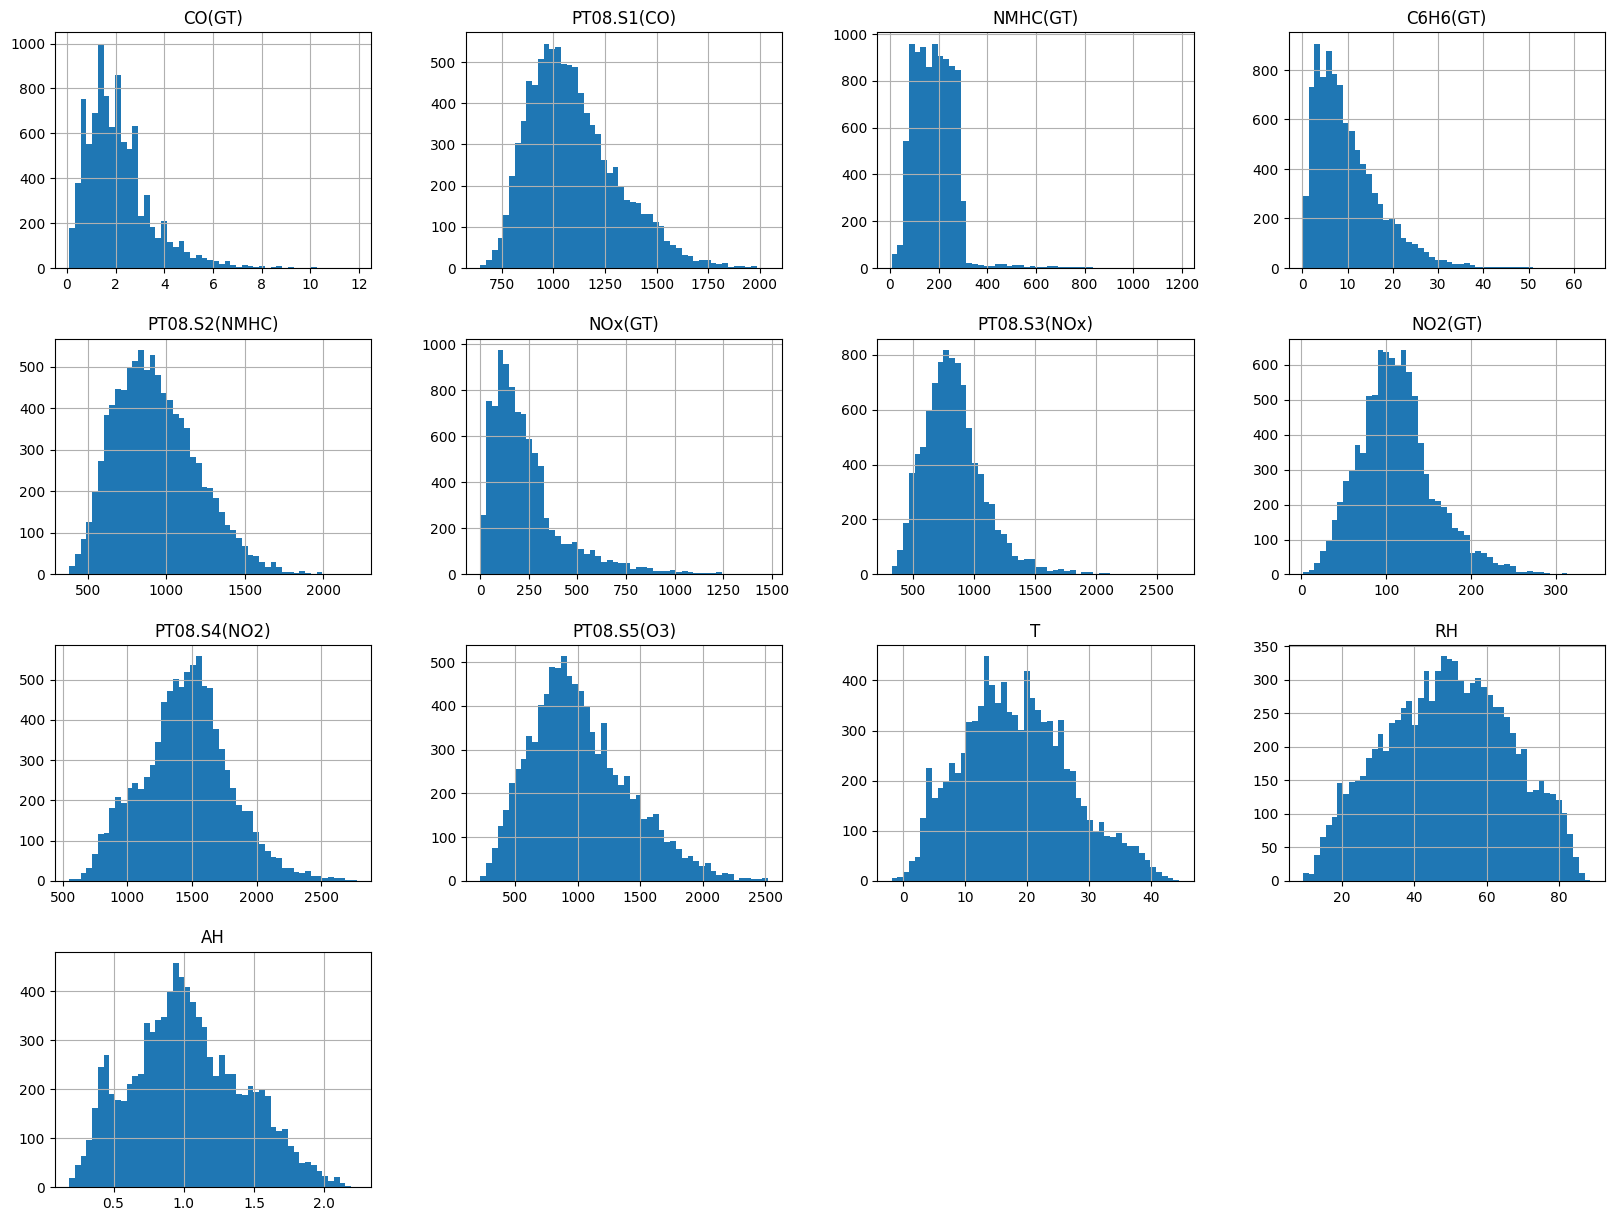

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = data1.select_dtypes(include=[np.number])

# Verificar las columnas numéricas seleccionadas
print(numeric_columns.columns)

# Histogramas de las variables numéricas
numeric_columns.hist(bins=50, figsize=(20,15))
plt.show()

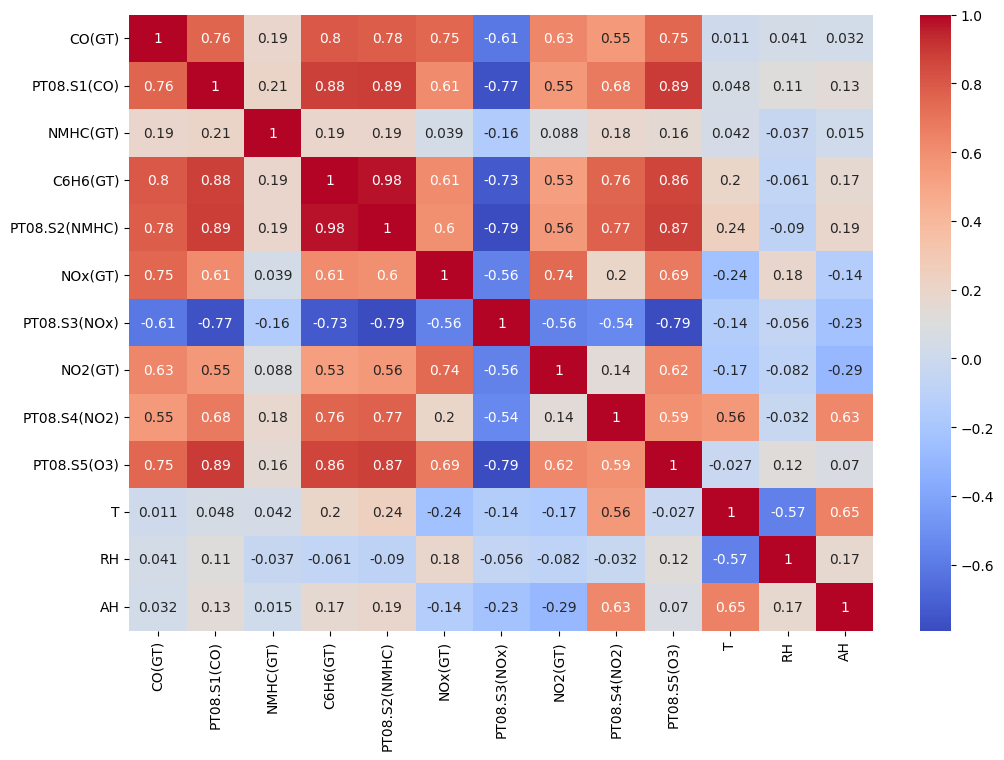

In [ ]:
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(data1)

            Date      Time  CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0  150.000000      11.9   
1     10/03/2004  19.00.00     2.0       1292.0  112.000000       9.4   
2     10/03/2004  20.00.00     2.2       1402.0   88.000000       9.0   
3     10/03/2004  21.00.00     2.2       1376.0   80.000000       9.2   
4     10/03/2004  22.00.00     1.6       1272.0   51.000000       6.5   
...          ...       ...     ...          ...         ...       ...   
9352  04/04/2005  10.00.00     3.1       1314.0  180.529038      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0  263.516490      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0  273.308780      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0   67.099575       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0  239.620747      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0   

MSE promedio en validación cruzada: 326.6311839688416
R^2 promedio en validación cruzada: 0.8355041075402628
MSE en el conjunto de prueba: 306.97923632927757
R^2 en el conjunto de prueba: 0.8459268626485654


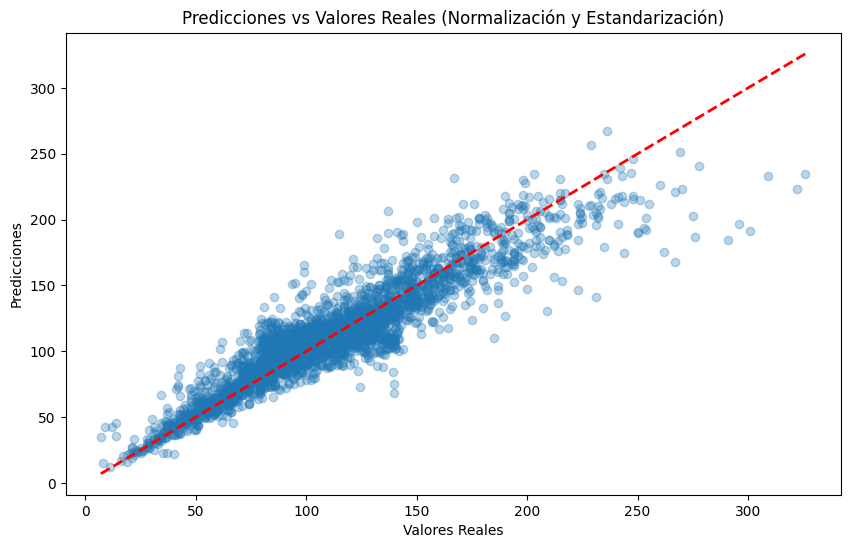

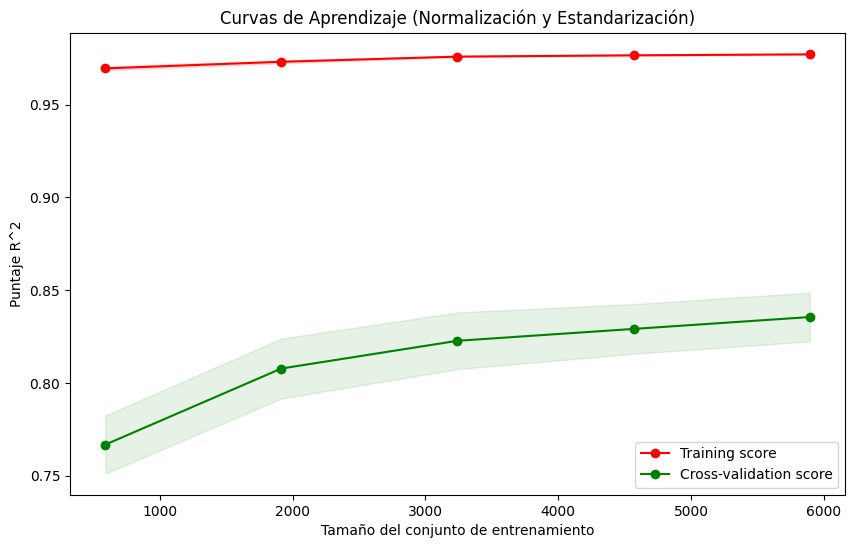

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos (usando data1)
# Separar las características (X) y la variable objetivo (y)
X = data1.drop(columns=['Date', 'Time', 'NO2(GT)'])
y = data1['NO2(GT)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalización y Estandarización
scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()

# Primero aplicar la normalización
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Luego aplicar la estandarización
X_train_norm_std = scaler_std.fit_transform(X_train_minmax)
X_test_norm_std = scaler_std.transform(X_test_minmax)

# Configurar K-Fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Crear y entrenar el modelo con validación cruzada K-Fold
model = RandomForestRegressor(random_state=42)
mse_scores = cross_val_score(model, X_train_norm_std, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X_train_norm_std, y_train, cv=kf, scoring='r2')

# Calcular métricas de validación cruzada
mse_mean = -mse_scores.mean()
r2_mean = r2_scores.mean()

print(f"MSE promedio en validación cruzada: {mse_mean}")
print(f"R^2 promedio en validación cruzada: {r2_mean}")

# Entrenar el modelo en el conjunto de entrenamiento completo
model.fit(X_train_norm_std, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_norm_std)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"MSE en el conjunto de prueba: {mse_test}")
print(f"R^2 en el conjunto de prueba: {r2_test}")

# Gráfica de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Normalización y Estandarización)')
plt.show()

# Gráfica de curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train_norm_std, y_train, cv=kf, scoring='r2', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Puntaje R^2')
plt.title('Curvas de Aprendizaje (Normalización y Estandarización)')
plt.legend(loc='best')
plt.show()

In [ ]:
# Función para predecir nuevos datos y evaluar la calidad del aire
def predict_and_evaluate(new_data):
    prediction = model.predict(new_data)[0]

    if prediction <= 50:
        quality = "Buena - La calidad del aire se considera satisfactoria y la contaminación del aire presenta poco o ningún riesgo."
    elif prediction <= 100:
        quality = "Moderada - La calidad del aire es aceptable; sin embargo, para algunos contaminantes puede haber una preocupación moderada para la salud de un muy pequeño número de personas que son inusualmente sensibles a la contaminación del aire."
    elif prediction <= 150:
        quality = "No saludable para grupos sensibles - Miembros de grupos sensibles pueden experimentar efectos en la salud. El público en general no es probable que se vea afectado."
    elif prediction <= 200:
        quality = "No saludable - Todos pueden comenzar a experimentar efectos en la salud; miembros de grupos sensibles pueden experimentar efectos más graves en la salud."
    elif prediction <= 300:
        quality = "Muy poco saludable - Alerta de salud: todos pueden experimentar efectos más graves en la salud."
    else:
        quality = "Peligroso - Advertencia de condiciones de emergencia. Toda la población es más probable que se vea afectada."

    print(f"Predicción para los nuevos datos: {prediction} µg/m³")
    print(f"Calidad del aire: {quality}")

# Ejemplo de uso de la función de predicción con valores de ejemplo dentro de los rangos observados
new_data = np.array([[
    20,    # CO(GT)
    80, # PT08.S1(CO)
    110,  # NMHC(GT)
    100.0,   # C6H6(GT)
    10.0,  # PT08.S2(NMHC)
    2000.0,  # NOx(GT)
    500.0,  # PT08.S3(NOx)
    300.0, # PT08.S4(NO2)
    50.0, # PT08.S5(O3)
    90.0,   # T
    100.0,   # RH
    1.0     # AH (Absolute Humidity)
]])

predict_and_evaluate(new_data)

Predicción para los nuevos datos: 186.56 µg/m³
Calidad del aire: No saludable - Todos pueden comenzar a experimentar efectos en la salud; miembros de grupos sensibles pueden experimentar efectos más graves en la salud.
